In [1]:
from src.embeddings.car_make import CarMakeEmbedding
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import torch.nn as nn
import pandas as pd
import pickle
import torch

In [6]:
df = pd.read_csv('/Users/ignasi/Documents/_03_MDS_/_01_ADSDB_/data/Car_Model_List.csv')

In [7]:
data_make = list(map(lambda x: x.lower(), list(df['Make'])))

In [10]:
label_encoder = LabelEncoder()
make_encoded = label_encoder.fit_transform(data_make)

In [11]:
make_tensor = torch.tensor(make_encoded, dtype=torch.long)
num_makes = len(label_encoder.classes_)
embedding = nn.Embedding(
    num_embeddings=num_makes, embedding_dim=10
)

In [18]:
makes = embedding(make_tensor).detach().numpy()

In [19]:
pca = PCA(n_components=2)
makes_2d = pca.fit_transform(makes)

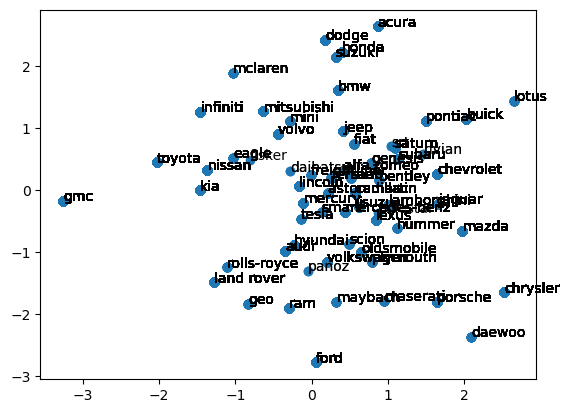

In [36]:
fig, ax = plt.subplots()
ax.scatter(makes_2d[:,0], makes_2d[:,1])

for i, txt in enumerate(data_make):
    ax.annotate(txt, (makes_2d[i,0], makes_2d[i,1]))

In [2]:
cme = CarMakeEmbedding(csv_path='/Users/ignasi/Documents/_03_MDS_/_01_ADSDB_/data/Car_Model_List.csv')

In [4]:
cme.execute('bmw')

tensor([[-0.3765,  0.9458, -0.3961, -1.1989,  0.8375,  1.0579, -0.9940,  0.1727,
         -1.8274, -0.1460]], grad_fn=<EmbeddingBackward0>)

In [2]:
with open('/Users/ignasi/Documents/_03_MDS_/_01_ADSDB_/src/embeddings/encoder.pkl', "rb") as f:
    encoder = pickle.load(f)

In [3]:
encoder

LabelEncoder()